#### Mugdha Sawalapurka
#### BE CMPN-B
#### 21101A0004

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

print(iris_df.head())  # Exploring the dataset

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (105, 4)
Testing set shape: (45, 4)


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Construct a Decision Tree classifier using the Gini Index
clf = DecisionTreeClassifier(criterion='gini', random_state=42)


In [4]:
# Train the classifier on the training set
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [5]:
# Predict the target variable on the testing set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)


In [6]:
from sklearn.metrics import confusion_matrix

# Construct and interpret the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [7]:
from sklearn.metrics import cohen_kappa_score

# Calculate and interpret the Kappa Statistics
kappa = cohen_kappa_score(y_test, y_pred)
print("Kappa Statistics:", kappa)


Kappa Statistics: 1.0


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate Sensitivity (Recall), Specificity, Precision, and F-measure
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_measure = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F-measure:", f_measure)


Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
F-measure: 1.0


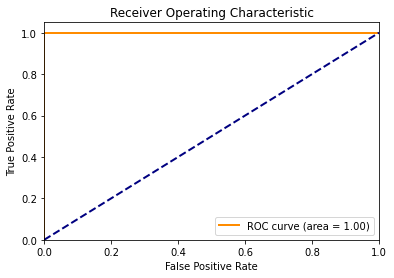

ROC AUC: 1.0


In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot the ROC curve and calculate the AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC:", roc_auc)
